In [2]:
import numpy as np
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트


import matplotlib.pyplot as plt # 그래프 시각화
import seaborn as sns # 그래프 시각화
from sklearn.preprocessing import LabelEncoder # 라벨 인코더
from datetime import datetime
from scipy import stats

In [4]:
train = files.upload()

Saving train.csv to train.csv


In [3]:
train = pd.read_csv('train.csv')
train.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,...,5.349000e+09,3.123072e+09,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [6]:
test = files.upload()

Saving test.csv to test.csv


In [4]:
test = pd.read_csv('test.csv')
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [7]:
train.drop('sgg', axis = 1, inplace = True)

In [8]:
test.drop('sgg', axis = 1, inplace = True)

## 2. EDA

### 2 - 1) 개업 및 폐업한 병원 수

In [9]:
oc = train['OC'].value_counts()
oc

open      286
 close     15
Name: OC, dtype: int64

In [10]:
print('개업중인 병원 ": {} '.format(oc['open']))

개업중인 병원 ": 286 


In [11]:
print('폐업한 병원 ": {} '.format(oc[' close']))

폐업한 병원 ": 15 


### 2 - 1) test 데이터에도 적용

In [12]:
test.drop('OC', axis = 1, inplace = True ) # test 데이터에는 ['OC']가 필요 없음

### 2 - 2) open과 close에 번호 분류한 후 정수값으로 변환하기

In [13]:
train['OC'] = train['OC'].map( {'open': 1, ' close': 0} ).astype(int)
train['OC']

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    0
298    0
299    0
300    1
Name: OC, Length: 301, dtype: int32

### 2 - 3) ['sido']의 값을 수치형으로 범주화 시키기

In [14]:
  train['sido'].unique()

array(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], dtype=object)

In [15]:
sido_encoder = LabelEncoder() # 인코더 생성

sido = list(train['sido'].values) + list(test['sido'].values) 
sido_set = set(sido)
print(len(sido_set))
sido_encoder.fit(list(sido_set)) # 인코딩

# 모든 학습, 시험 데이터의 정류장 정보 치환
train['sido'] = sido_encoder.transform(train['sido'])
test['sido'] = sido_encoder.transform(test['sido'])
test['sido'].unique

17


<bound method Series.unique of 0      10
1      11
2      13
3       0
4      12
       ..
122    13
123     8
124     8
125    11
126     1
Name: sido, Length: 127, dtype: int32>

### 2 - 3) test 데이터에도 적용

위의 과정이 test 데이터에도 적용 된 것

### 2 - 4) opendate

**2018년 폐업을 2017년 폐업으로 간주한다고 했으니 현재 train 데이터에 나타난 close는 18년 12월 31일까지 영업을 했다고 간주 함**   
= opendate와 18-12-13을 기준으로 연산하여 영업일이라는 파생변수를 생성

In [16]:
train['DATE'] = 20181231  # 파생변수 train['DATE']
train['DATE'] = train['DATE'].astype(str)
train['DATE'] = train['DATE'].str[0:4] + "-" + train['DATE'].str[4:6] + "-" + train['DATE'].str[6:8]
train['DATE'] = train['DATE'].astype('datetime64[ns]')
train['DATE']

0     2018-12-31
1     2018-12-31
2     2018-12-31
3     2018-12-31
4     2018-12-31
         ...    
296   2018-12-31
297   2018-12-31
298   2018-12-31
299   2018-12-31
300   2018-12-31
Name: DATE, Length: 301, dtype: datetime64[ns]

In [17]:
# train['openDate']의 값을 날짜형 데이터로 바꾸기 (굉장히 오래걸리고 찾는데 애를 씀)
train['openDate'] = train['openDate'].astype(str)
train['opendate'] = train['openDate'].str[0:4] + "-" + train['openDate'].str[4:6] + "-" + train['openDate'].str[6:8]
train['opendate'] = train['opendate'].astype('datetime64[ns]')

In [18]:
train.drop('openDate', axis = 1, inplace = True)

In [19]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,...,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,2018-12-31,2005-02-11
297,423,0,2,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,2018-12-31,2014-06-18
298,426,0,7,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,...,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,2018-12-31,1983-07-05
299,427,0,8,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,2018-12-31,2007-01-01


In [20]:
train['days'] = train['DATE'] - train['opendate']

In [21]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28,4021 days
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01,7944 days
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28,733 days
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14,6713 days
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01,4869 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,...,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,2018-12-31,2005-02-11,5071 days
297,423,0,2,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,2018-12-31,2014-06-18,1657 days
298,426,0,7,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,...,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,2018-12-31,1983-07-05,12963 days
299,427,0,8,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,2018-12-31,2007-01-01,4382 days


train['days']의 값을 정수형으로 바꾸기

In [22]:
train['days']

0      4021 days
1      7944 days
2       733 days
3      6713 days
4      4869 days
         ...    
296    5071 days
297    1657 days
298   12963 days
299    4382 days
300    6284 days
Name: days, Length: 301, dtype: timedelta64[ns]

In [23]:
train['days'] = train['days'].dt.days

In [24]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28,4021
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01,7944
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28,733
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14,6713
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01,4869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,...,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,2018-12-31,2005-02-11,5071
297,423,0,2,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,2018-12-31,2014-06-18,1657
298,426,0,7,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,...,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,2018-12-31,1983-07-05,12963
299,427,0,8,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,2018-12-31,2007-01-01,4382


### 2 - 5) test 데이터도 같은 작업

In [25]:
test['DATE'] = 20181231  # 파생변수 train['DATE']
test['DATE'] = test['DATE'].astype(str)
test['DATE'] = test['DATE'].str[0:4] + "-" + test['DATE'].str[4:6] + "-" + test['DATE'].str[6:8]
test['DATE'] = test['DATE'].astype('datetime64[ns]')
test['DATE']

0     2018-12-31
1     2018-12-31
2     2018-12-31
3     2018-12-31
4     2018-12-31
         ...    
122   2018-12-31
123   2018-12-31
124   2018-12-31
125   2018-12-31
126   2018-12-31
Name: DATE, Length: 127, dtype: datetime64[ns]

### 

In [26]:
test['openDate'][120] # 결측치를 특정값으로 대체

nan

In [27]:
test['openDate'][120] = 20011012.0
test.tail(20)

C:\ProgramData\Anaconda3\envs\mldl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE
107,382,16,19970422.0,103.0,hospital,8.159246e+10,1.495838e+10,5.838249e+10,4.118066e+10,1.001901e+09,...,1.531752e+10,0.0,2.357855e+10,1.479106e+10,4.077732e+10,2.377131e+10,604,604,same,2018-12-31
108,387,7,20060401.0,74.0,nursing_hospital,2.755846e+09,0.000000e+00,2.691651e+09,1.561923e+09,2.557720e+07,...,8.178688e+07,0.0,2.030000e+09,2.030000e+09,2.030865e+09,0.000000e+00,55,56,same,2018-12-31
109,388,7,20000801.0,102.0,hospital,9.737271e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.416483e+09,0.0,3.463048e+09,2.422436e+09,-9.232669e+08,0.000000e+00,33,20,same,2018-12-31
110,389,8,20120503.0,53.0,hospital,6.296805e+09,1.192329e+09,4.880758e+09,3.477672e+09,5.254576e+07,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63,63,same,2018-12-31
111,394,10,19990610.0,20.0,clinic,1.093225e+09,0.000000e+00,1.064146e+09,6.455580e+08,5.894591e+06,...,7.530078e+07,0.0,4.100000e+07,4.100000e+07,1.052438e+09,0.000000e+00,16,16,same,2018-12-31
112,395,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,36,NaN,NaN,2018-12-31
113,396,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,36,NaN,NaN,2018-12-31
114,397,12,20130722.0,194.0,nursing_hospital,5.479248e+09,2.959746e+08,5.173015e+09,3.263054e+09,7.071508e+06,...,3.789703e+08,0.0,2.092021e+09,2.092021e+09,5.475197e+09,0.000000e+00,106,103,same,2018-12-31
115,398,11,20070912.0,13.0,nursing_hospital,7.492834e+09,0.000000e+00,6.547070e+09,2.527670e+09,1.481209e+08,...,4.767853e+08,0.0,6.457484e+09,5.786636e+09,3.217245e+09,0.000000e+00,66,68,same,2018-12-31
116,401,9,20080602.0,170.0,hospital,7.897861e+09,8.668840e+08,6.393699e+09,3.553658e+09,3.082714e+07,...,7.092447e+08,0.0,3.150323e+09,3.150323e+09,5.881965e+09,1.299147e+09,104,98,same,2018-12-31


In [28]:
# train['openDate']의 값을 날짜형 데이터로 바꾸기 (굉장히 오래걸리고 찾는데 애를 씀)
test['openDate'] = test['openDate'].astype(str)
test['opendate'] = test['openDate'].str[0:4] + "-" + test['openDate'].str[4:6] + "-" + test['openDate'].str[6:8]
test['opendate'] = test['opendate'].astype('datetime64[ns]')

In [29]:
test['opendate']

0     1998-11-25
1     2016-03-09
2     1989-04-27
3     2010-02-26
4     2004-06-04
         ...    
122   2001-10-12
123   2001-05-30
124   2001-01-01
125   2001-02-01
126   1996-12-16
Name: opendate, Length: 127, dtype: datetime64[ns]

In [30]:
test['days'] = test['DATE'] - test['opendate']

In [31]:
test.tail(20)

,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
107,382,16,19970422.0,103.0,hospital,8.159246e+10,1.495838e+10,5.838249e+10,4.118066e+10,1.001901e+09,...,2.357855e+10,1.479106e+10,4.077732e+10,2.377131e+10,604,604,same,2018-12-31,1997-04-22,7923 days
108,387,7,20060401.0,74.0,nursing_hospital,2.755846e+09,0.000000e+00,2.691651e+09,1.561923e+09,2.557720e+07,...,2.030000e+09,2.030000e+09,2.030865e+09,0.000000e+00,55,56,same,2018-12-31,2006-04-01,4657 days
109,388,7,20000801.0,102.0,hospital,9.737271e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.463048e+09,2.422436e+09,-9.232669e+08,0.000000e+00,33,20,same,2018-12-31,2000-08-01,6726 days
110,389,8,20120503.0,53.0,hospital,6.296805e+09,1.192329e+09,4.880758e+09,3.477672e+09,5.254576e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63,63,same,2018-12-31,2012-05-03,2433 days
111,394,10,19990610.0,20.0,clinic,1.093225e+09,0.000000e+00,1.064146e+09,6.455580e+08,5.894591e+06,...,4.100000e+07,4.100000e+07,1.052438e+09,0.000000e+00,16,16,same,2018-12-31,1999-06-10,7144 days
112,395,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,36,NaN,NaN,2018-12-31,2016-12-29,732 days
113,396,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,36,NaN,NaN,2018-12-31,2016-12-29,732 days
114,397,12,20130722.0,194.0,nursing_hospital,5.479248e+09,2.959746e+08,5.173015e+09,3.263054e+09,7.071508e+06,...,2.092021e+09,2.092021e+09,5.475197e+09,0.000000e+00,106,103,same,2018-12-31,2013-07-22,1988 days
115,398,11,20070912.0,13.0,nursing_hospital,7.492834e+09,0.000000e+00,6.547070e+09,2.527670e+09,1.481209e+08,...,6.457484e+09,5.786636e+09,3.217245e+09,0.000000e+00,66,68,same,2018-12-31,2007-09-12,4128 days
116,401,9,20080602.0,170.0,hospital,7.897861e+09,8.668840e+08,6.393699e+09,3.553658e+09,3.082714e+07,...,3.150323e+09,3.150323e+09,5.881965e+09,1.299147e+09,104,98,same,2018-12-31,2008-06-02,3864 days


In [32]:
test['days']

0      7341 days
1      1027 days
2     10840 days
3      3230 days
4      5323 days
         ...    
122    6289 days
123    6424 days
124    6573 days
125    6542 days
126    8050 days
Name: days, Length: 127, dtype: timedelta64[ns]

In [33]:
test['days'] = test['days'].dt.days

In [34]:
test

,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,2,10,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,...,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same,2018-12-31,1998-11-25,7341
1,5,11,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,...,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same,2018-12-31,2016-03-09,1027
2,6,13,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN,2018-12-31,1989-04-27,10840
3,8,0,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,...,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same,2018-12-31,2010-02-26,3230
4,10,12,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,...,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same,2018-12-31,2004-06-04,5323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,13,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,4.236289e+08,...,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560,NaN,NaN,2018-12-31,2001-10-12,6289
123,425,8,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,6.824241e+09,3.145447e+07,...,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132,137,same,2018-12-31,2001-05-30,6424
124,429,8,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,2.723450e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,2018-12-31,2001-01-01,6573
125,430,11,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,8.509815e+07,...,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363,343,same,2018-12-31,2001-02-01,6542


opendate가 결측치 였던 행의 days 값을 test 데이터의 평균값으로 대체

In [35]:
test['days'].mean()

4928.314960629921

In [36]:
test['days'][120] = 4928.314960629921

C:\ProgramData\Anaconda3\envs\mldl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 2 - 6) 변수 = bedCount 결측치 처리(train 데이터에서만)

In [37]:
train = train[train['bedCount'].notnull()]
train['bedCount'] = train['bedCount'].replace(0, train['bedCount'].median())
test['bedCount'] = test['bedCount'].fillna(test[test['bedCount'].notnull()]['bedCount'].median())
test['bedCount'] = test['bedCount'].replace(0, train['bedCount'].median())

C:\ProgramData\Anaconda3\envs\mldl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
train['bedCount']

0      175.0
1      410.0
2      468.0
3      353.0
4      196.0
       ...  
293    109.0
294    367.0
295    136.5
296    214.0
299    180.0
Name: bedCount, Length: 296, dtype: float64

### 2 - 7) 변수 =  instkind 결측치 처리(train 데이터에서만)

In [39]:
train = train[train['instkind'].notnull()]
test['instkind'] = test['instkind'].fillna('empty')
instkind_encoder = LabelEncoder() # 인코더 생성

_instkind = list(train['instkind'].values) + list(test['instkind'].values) 
instkind_set = set(_instkind)
instkind_encoder.fit(list(instkind_set)) # 인코딩

# train과 test에 숫자형 치환
train['instkind'] = instkind_encoder.transform(train['instkind'])
test['instkind'] = instkind_encoder.transform(test['instkind'])

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 299
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   inst_id             296 non-null    int64         
 1   OC                  296 non-null    int32         
 2   sido                296 non-null    int32         
 3   bedCount            296 non-null    float64       
 4   instkind            296 non-null    int32         
 5   revenue1            288 non-null    float64       
 6   salescost1          288 non-null    float64       
 7   sga1                288 non-null    float64       
 8   salary1             288 non-null    float64       
 9   noi1                288 non-null    float64       
 10  noe1                288 non-null    float64       
 11  interest1           288 non-null    float64       
 12  ctax1               288 non-null    float64       
 13  profit1             288 non-null    float64       

### 2 - 7) 변수 = revenue1 ~ surplus2 결측치 처리

In [41]:
# train 데이터
r1s2_drop = train.fillna(0)

In [42]:
missing_fill_val = {'revenue1': r1s2_drop.revenue1.mean(),
                    'salescost1': r1s2_drop.salescost1.mean(),
                    'sga1': r1s2_drop.sga1.mean(),
                    'salary1': r1s2_drop.salary1.mean(),
                    'noi1': r1s2_drop.noi1.mean(),
                    'noe1': r1s2_drop.noe1.mean(),
                    'interest1': r1s2_drop.interest1.mean(),
                    'ctax1': r1s2_drop.ctax1.mean(),
                    'profit1': r1s2_drop.profit1.mean(),
                    'liquidAsset1': r1s2_drop.liquidAsset1.mean(),
                    'quickAsset1': r1s2_drop.quickAsset1.mean(),
                    'receivableS1': r1s2_drop.receivableS1.mean(),
                    'inventoryAsset1': r1s2_drop.inventoryAsset1.mean(),
                    'nonCAsset1': r1s2_drop.nonCAsset1.mean(),
                    'tanAsset1': r1s2_drop.tanAsset1.mean(),
                    'OnonCAsset1': r1s2_drop.OnonCAsset1.mean(),
                    'receivableL1': r1s2_drop.receivableL1.mean(),
                    'debt1': r1s2_drop.debt1.mean(),
                    'liquidLiabilities1': r1s2_drop.liquidLiabilities1.mean(),
                    'shortLoan1': r1s2_drop.shortLoan1.mean(),
                    'NCLiabilities1': r1s2_drop.NCLiabilities1.mean(),
                    'longLoan1': r1s2_drop.longLoan1.mean(),
                    'netAsset1': r1s2_drop.netAsset1.mean(),
                    'surplus1': r1s2_drop.surplus1.mean(),
                    'revenue2': r1s2_drop.revenue2.mean(),
                    'salescost2': r1s2_drop.salescost2.mean(),
                    'sga2': r1s2_drop.sga2.mean(),
                    'salary2': r1s2_drop.salary2.mean(),
                    'noi2': r1s2_drop.noi2.mean(),
                    'noe2': r1s2_drop.noe2.mean(),
                    'interest2': r1s2_drop.interest2.mean(),
                    'ctax2': r1s2_drop.ctax2.mean(),
                    'profit2': r1s2_drop.profit2.mean(),
                    'liquidAsset2': r1s2_drop.liquidAsset2.mean(),
                    'quickAsset2': r1s2_drop.quickAsset2.mean(),
                    'receivableS2': r1s2_drop.receivableS2.mean(),
                    'inventoryAsset2': r1s2_drop.inventoryAsset2.mean(),
                    'nonCAsset2': r1s2_drop.nonCAsset2.mean(),
                    'tanAsset2': r1s2_drop.tanAsset2.mean(),
                    'OnonCAsset2': r1s2_drop.OnonCAsset2.mean(),
                    'receivableL2': r1s2_drop.receivableL2.mean(),
                    'debt2': r1s2_drop.debt2.mean(),
                    'liquidLiabilities2': r1s2_drop.liquidLiabilities2.mean(),
                    'shortLoan2': r1s2_drop.shortLoan2.mean(),
                    'NCLiabilities2': r1s2_drop.NCLiabilities2.mean(),
                    'longLoan2': r1s2_drop.longLoan2.mean(),
                    'netAsset2': r1s2_drop.netAsset2.mean(),
                    'surplus2': r1s2_drop.surplus2.mean()}

In [43]:
train2 = r1s2_drop.replace(0, missing_fill_val)

In [44]:
# test 데이터
r1s2_drop = test.fillna(0)

In [45]:
missing_fill_val = {'revenue1': r1s2_drop.revenue1.mean(),
                    'salescost1': r1s2_drop.salescost1.mean(),
                    'sga1': r1s2_drop.sga1.mean(),
                    'salary1': r1s2_drop.salary1.mean(),
                    'noi1': r1s2_drop.noi1.mean(),
                    'noe1': r1s2_drop.noe1.mean(),
                    'interest1': r1s2_drop.interest1.mean(),
                    'ctax1': r1s2_drop.ctax1.mean(),
                    'profit1': r1s2_drop.profit1.mean(),
                    'liquidAsset1': r1s2_drop.liquidAsset1.mean(),
                    'quickAsset1': r1s2_drop.quickAsset1.mean(),
                    'receivableS1': r1s2_drop.receivableS1.mean(),
                    'inventoryAsset1': r1s2_drop.inventoryAsset1.mean(),
                    'nonCAsset1': r1s2_drop.nonCAsset1.mean(),
                    'tanAsset1': r1s2_drop.tanAsset1.mean(),
                    'OnonCAsset1': r1s2_drop.OnonCAsset1.mean(),
                    'receivableL1': r1s2_drop.receivableL1.mean(),
                    'debt1': r1s2_drop.debt1.mean(),
                    'liquidLiabilities1': r1s2_drop.liquidLiabilities1.mean(),
                    'shortLoan1': r1s2_drop.shortLoan1.mean(),
                    'NCLiabilities1': r1s2_drop.NCLiabilities1.mean(),
                    'longLoan1': r1s2_drop.longLoan1.mean(),
                    'netAsset1': r1s2_drop.netAsset1.mean(),
                    'surplus1': r1s2_drop.surplus1.mean(),
                    'revenue2': r1s2_drop.revenue2.mean(),
                    'salescost2': r1s2_drop.salescost2.mean(),
                    'sga2': r1s2_drop.sga2.mean(),
                    'salary2': r1s2_drop.salary2.mean(),
                    'noi2': r1s2_drop.noi2.mean(),
                    'noe2': r1s2_drop.noe2.mean(),
                    'interest2': r1s2_drop.interest2.mean(),
                    'ctax2': r1s2_drop.ctax2.mean(),
                    'profit2': r1s2_drop.profit2.mean(),
                    'liquidAsset2': r1s2_drop.liquidAsset2.mean(),
                    'quickAsset2': r1s2_drop.quickAsset2.mean(),
                    'receivableS2': r1s2_drop.receivableS2.mean(),
                    'inventoryAsset2': r1s2_drop.inventoryAsset2.mean(),
                    'nonCAsset2': r1s2_drop.nonCAsset2.mean(),
                    'tanAsset2': r1s2_drop.tanAsset2.mean(),
                    'OnonCAsset2': r1s2_drop.OnonCAsset2.mean(),
                    'receivableL2': r1s2_drop.receivableL2.mean(),
                    'debt2': r1s2_drop.debt2.mean(),
                    'liquidLiabilities2': r1s2_drop.liquidLiabilities2.mean(),
                    'shortLoan2': r1s2_drop.shortLoan2.mean(),
                    'NCLiabilities2': r1s2_drop.NCLiabilities2.mean(),
                    'longLoan2': r1s2_drop.longLoan2.mean(),
                    'netAsset2': r1s2_drop.netAsset2.mean(),
                    'surplus2': r1s2_drop.surplus2.mean()}

In [46]:
test2 = r1s2_drop.replace(0, missing_fill_val)

In [47]:
# emplyee1,2
train2['employee1'] = train2['employee1'].replace(0, train2['employee1'].median())
train2['employee2'] = train2['employee2'].replace(0, train2['employee2'].median())

In [48]:
test2.employee1 = test2.employee1.astype('str').str.replace(",", "").astype('float')
test2.employee2 = test2.employee2.astype('str').str.replace(",", "").astype('float')

In [49]:
test2['employee1'] = test2['employee1'].replace(0, test2['employee1'].median())
test2['employee2'] = test2['employee2'].replace(0, test2['employee2'].median())

In [50]:
# ownerChange
train2['ownerChange'] = train2['ownerChange'].replace(0, 'empty')
test2['ownerChange'] = test2['ownerChange'].replace(0, 'empty')
ownerChange_encoder = LabelEncoder() # 인코더 생성

_ownerChange = list(train2['ownerChange'].values)
ownerChange_set = set(_ownerChange)
print(len(ownerChange_set))
ownerChange_encoder.fit(list(ownerChange_set)) # 인코딩

# train과 test에 숫자형 치환
train2['ownerChange'] = ownerChange_encoder.transform(train2['ownerChange'])
test2['ownerChange'] = ownerChange_encoder.transform(test2['ownerChange'])

3


### 2 - 8) one-hot-encoding(모델을 돌리기 위해 범주형을 인코딩한 것)

In [51]:
train2 = pd.get_dummies(train2, columns=['sido'])
test2 = pd.get_dummies(test2, columns=['sido'])

In [52]:
train2 = pd.get_dummies(train2, columns=['instkind'])
test2 = pd.get_dummies(test2, columns=['instkind'])

In [53]:
train2 = pd.get_dummies(train2, columns=['ownerChange'])
test2 = pd.get_dummies(test2, columns=['ownerChange'])

In [54]:
train2 = train2.reset_index(drop=True)

In [55]:
test2 = test2.reset_index(drop=True)

In [56]:
train2 = train2.drop(['DATE', 'opendate'], axis = 1)

In [57]:
test2 = test2.drop(['DATE', 'opendate', 'openDate'], axis = 1)

In [58]:
train2

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_0,instkind_1,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,1,1,175.0,4.217530e+09,1.963479e+09,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,...,0,0,0,0,1,0,0,0,0,1
1,3,1,410.0,1.270897e+10,1.963479e+09,1.021233e+10,5.588052e+09,2.662286e+08,5.041395e+08,1.834514e+08,...,0,0,1,0,0,0,0,0,0,1
2,4,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,1.834514e+08,...,0,0,0,0,1,0,0,0,0,1
3,7,1,353.0,7.250734e+10,1.963479e+09,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,...,0,0,1,0,0,0,0,0,0,1
4,9,1,196.0,4.904354e+10,1.963479e+09,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,109.0,4.303270e+09,2.423876e+08,3.455912e+09,2.228914e+09,3.840153e+06,2.678230e+08,8.686978e+07,...,0,0,0,1,0,0,0,0,0,1
292,419,1,367.0,1.207963e+10,5.309241e+08,9.521440e+09,5.691328e+09,4.977374e+07,1.151424e+09,2.028828e+08,...,0,0,0,0,1,0,0,0,0,1
293,420,1,136.5,5.500472e+09,1.963479e+09,4.883855e+09,2.653680e+09,6.268103e+07,3.831812e+08,5.345165e+07,...,0,0,0,0,1,0,0,0,0,1
294,422,1,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,4.209897e+07,7.439421e+08,1.875761e+08,...,0,0,0,0,1,0,0,0,0,1


In [59]:
test2

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,instkind_0,instkind_2,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,2,300.00,6.682486e+10,3.910749e+09,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,7.668000e+07,...,0,0,1,0,0,0,0,0,0,1
1,5,44.00,3.495758e+10,3.910749e+09,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,1.130527e+08,...,0,0,0,1,0,0,0,0,0,1
2,6,276.00,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,1.130527e+08,...,0,0,1,0,0,0,0,0,1,0
3,8,363.00,1.795715e+10,3.910749e+09,1.319301e+10,7.298311e+09,4.850652e+09,2.060989e+09,3.118360e+08,1.130527e+08,...,0,0,1,0,0,0,0,0,0,1
4,10,213.00,5.037025e+10,3.910749e+09,4.855803e+10,2.296346e+10,1.534452e+09,8.567231e+08,2.573804e+09,1.130527e+08,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,136.75,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,4.236289e+08,1.304817e+09,4.179491e+08,4.158945e+08,...,0,0,0,0,0,1,0,0,1,0
123,425,156.00,1.833906e+10,3.910749e+09,1.760117e+10,6.824241e+09,3.145447e+07,2.122632e+07,2.095582e+07,6.903334e+08,...,0,0,0,0,0,0,1,0,0,1
124,429,150.00,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,2.723450e+07,8.607279e+08,8.471681e+08,1.853294e+07,...,0,0,0,1,0,0,0,0,1,0
125,430,156.00,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,8.509815e+07,1.270081e+09,8.379266e+08,3.180206e+07,...,0,1,0,0,0,0,0,0,0,1


### 2 - 파생변수 
파생변수(영업이익) -> 매출액 - (원가 + 판매비와 관리비)

In [60]:
train2['business profits1'] = train2['revenue1'] - (train2['salescost1'] + train2['sga1'] )
train2['business profits2'] = train2['revenue2'] - (train2['salescost2'] + train2['sga2'] )
train2.head()

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2
0,1,1,175.0,4.217530e+09,1.963479e+09,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,...,0,0,1,0,0,0,0,1,-1.707083e+09,-1.569443e+09
1,3,1,410.0,1.270897e+10,1.963479e+09,1.021233e+10,5.588052e+09,2.662286e+08,5.041395e+08,1.834514e+08,...,1,0,0,0,0,0,0,1,5.331689e+08,6.576224e+08
2,4,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,1.834514e+08,...,0,0,1,0,0,0,0,1,4.181860e+07,6.576224e+08
3,7,1,353.0,7.250734e+10,1.963479e+09,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,...,1,0,0,0,0,0,0,1,-1.335340e+08,1.242746e+08
4,9,1,196.0,4.904354e+10,1.963479e+09,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,...,1,0,0,0,0,0,0,1,-5.759917e+08,-8.528666e+08


In [61]:
test2['business profits1'] = test2['revenue1'] - (test2['salescost1'] + test2['sga1'] )
test2['business profits2'] = test2['revenue2'] - (test2['salescost2'] + test2['sga2'] )
test2.head()

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2
0,2,300.0,6.682486e+10,3.910749e+09,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,7.668000e+07,...,1,0,0,0,0,0,0,1,-2.742976e+09,-2.592398e+09
1,5,44.0,3.495758e+10,3.910749e+09,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,1.130527e+08,...,0,1,0,0,0,0,0,1,-1.545870e+09,-4.727591e+09
2,6,276.0,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,1.130527e+08,...,1,0,0,0,0,0,1,0,-2.369750e+09,-5.592507e+08
3,8,363.0,1.795715e+10,3.910749e+09,1.319301e+10,7.298311e+09,4.850652e+09,2.060989e+09,3.118360e+08,1.130527e+08,...,1,0,0,0,0,0,0,1,8.533893e+08,9.039969e+08
4,10,213.0,5.037025e+10,3.910749e+09,4.855803e+10,2.296346e+10,1.534452e+09,8.567231e+08,2.573804e+09,1.130527e+08,...,1,0,0,0,0,0,0,1,-2.098526e+09,-7.730316e+08


### 2 - 파생변수2)
### 부채비율 = (부채총액/매출액) *100

In [62]:
train2['Debt ratio1'] = train2['debt1']/train2['revenue1'] * 100
train2['Debt ratio2'] = train2['debt2']/train2['revenue2'] * 100
train2

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,1,1,175.0,4.217530e+09,1.963479e+09,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,...,1,0,0,0,0,1,-1.707083e+09,-1.569443e+09,16.190187,17.659854
1,3,1,410.0,1.270897e+10,1.963479e+09,1.021233e+10,5.588052e+09,2.662286e+08,5.041395e+08,1.834514e+08,...,0,0,0,0,0,1,5.331689e+08,6.576224e+08,67.885731,69.322667
2,4,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,1.834514e+08,...,1,0,0,0,0,1,4.181860e+07,6.576224e+08,9.199833,69.322667
3,7,1,353.0,7.250734e+10,1.963479e+09,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,...,0,0,0,0,0,1,-1.335340e+08,1.242746e+08,58.426908,56.470161
4,9,1,196.0,4.904354e+10,1.963479e+09,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,...,0,0,0,0,0,1,-5.759917e+08,-8.528666e+08,101.742467,106.966715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,109.0,4.303270e+09,2.423876e+08,3.455912e+09,2.228914e+09,3.840153e+06,2.678230e+08,8.686978e+07,...,0,0,0,0,0,1,6.049699e+08,5.103322e+08,114.851309,129.157973
292,419,1,367.0,1.207963e+10,5.309241e+08,9.521440e+09,5.691328e+09,4.977374e+07,1.151424e+09,2.028828e+08,...,1,0,0,0,0,1,2.027268e+09,1.474776e+09,67.032018,66.166646
293,420,1,136.5,5.500472e+09,1.963479e+09,4.883855e+09,2.653680e+09,6.268103e+07,3.831812e+08,5.345165e+07,...,1,0,0,0,0,1,-1.346862e+09,-1.190205e+09,81.423685,71.013654
294,422,1,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,4.209897e+07,7.439421e+08,1.875761e+08,...,1,0,0,0,0,1,1.296230e+09,-9.211679e+07,114.454586,133.314706


In [63]:
test2['Debt ratio1'] = test2['debt1']/test2['revenue1'] * 100
test2['Debt ratio2'] = test2['debt2']/test2['revenue2'] * 100
test2

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,2,300.00,6.682486e+10,3.910749e+09,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,7.668000e+07,...,0,0,0,0,0,1,-2.742976e+09,-2.592398e+09,101.295972,87.111891
1,5,44.00,3.495758e+10,3.910749e+09,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,1.130527e+08,...,0,0,0,0,0,1,-1.545870e+09,-4.727591e+09,189.565108,179.285681
2,6,276.00,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,1.130527e+08,...,0,0,0,0,1,0,-2.369750e+09,-5.592507e+08,56.606520,47.451257
3,8,363.00,1.795715e+10,3.910749e+09,1.319301e+10,7.298311e+09,4.850652e+09,2.060989e+09,3.118360e+08,1.130527e+08,...,0,0,0,0,0,1,8.533893e+08,9.039969e+08,161.043406,73.862437
4,10,213.00,5.037025e+10,3.910749e+09,4.855803e+10,2.296346e+10,1.534452e+09,8.567231e+08,2.573804e+09,1.130527e+08,...,0,0,0,0,0,1,-2.098526e+09,-7.730316e+08,97.709196,101.080187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,136.75,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,4.236289e+08,1.304817e+09,4.179491e+08,4.158945e+08,...,0,1,0,0,1,0,2.989286e+09,3.490860e+09,70.878401,69.801777
123,425,156.00,1.833906e+10,3.910749e+09,1.760117e+10,6.824241e+09,3.145447e+07,2.122632e+07,2.095582e+07,6.903334e+08,...,0,0,1,0,0,1,-3.172852e+09,-2.717027e+09,10.571477,16.618479
124,429,150.00,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,2.723450e+07,8.607279e+08,8.471681e+08,1.853294e+07,...,0,0,0,0,1,0,1.029267e+09,8.372569e+08,92.446531,89.587166
125,430,156.00,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,8.509815e+07,1.270081e+09,8.379266e+08,3.180206e+07,...,0,0,0,0,0,1,2.634129e+09,2.365026e+09,78.874262,78.184612


### 2 - 9) 히스토그램으로 정규분포 확인하기

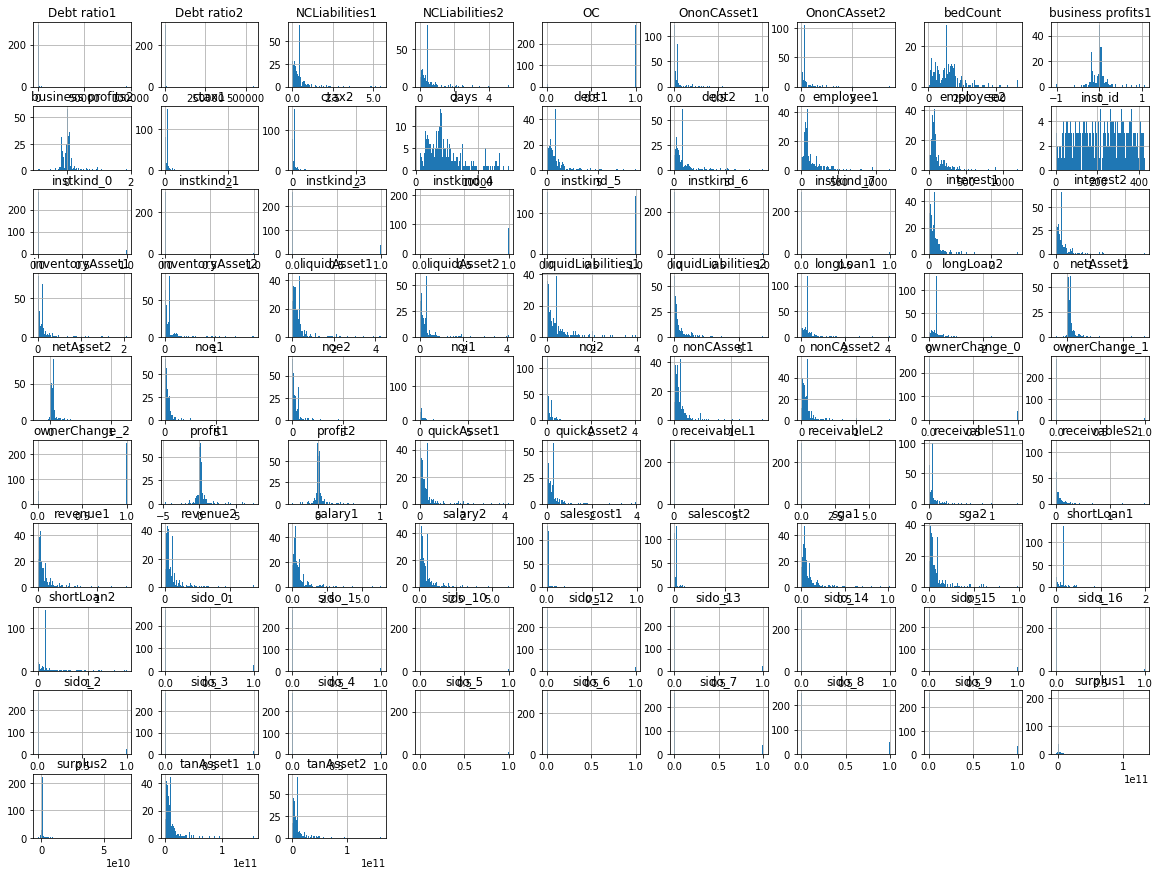

In [64]:
train2.hist(bins=100, figsize=(20,15))
plt.show()

In [65]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             296 non-null    int64  
 1   OC                  296 non-null    int32  
 2   bedCount            296 non-null    float64
 3   revenue1            296 non-null    float64
 4   salescost1          296 non-null    float64
 5   sga1                296 non-null    float64
 6   salary1             296 non-null    float64
 7   noi1                296 non-null    float64
 8   noe1                296 non-null    float64
 9   interest1           296 non-null    float64
 10  ctax1               296 non-null    float64
 11  profit1             296 non-null    float64
 12  liquidAsset1        296 non-null    float64
 13  quickAsset1         296 non-null    float64
 14  receivableS1        296 non-null    float64
 15  inventoryAsset1     296 non-null    float64
 16  nonCAsse

In [66]:
train2.tail()

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
291,418,1,109.0,4.303270e+09,2.423876e+08,3.455912e+09,2.228914e+09,3840153.0,2.678230e+08,86869777.0,...,0,0,0,0,0,1,6.049699e+08,5.103322e+08,114.851309,129.157973
292,419,1,367.0,1.207963e+10,5.309241e+08,9.521440e+09,5.691328e+09,49773739.0,1.151424e+09,202882821.0,...,1,0,0,0,0,1,2.027268e+09,1.474776e+09,67.032018,66.166646
293,420,1,136.5,5.500472e+09,1.963479e+09,4.883855e+09,2.653680e+09,62681034.0,3.831812e+08,53451647.0,...,1,0,0,0,0,1,-1.346862e+09,-1.190205e+09,81.423685,71.013654
294,422,1,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,187576102.0,...,1,0,0,0,0,1,1.296230e+09,-9.211679e+07,114.454586,133.314706
295,427,0,180.0,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,5.366919e+08,514368798.0,...,1,0,0,0,1,0,-1.437527e+09,-1.139978e+09,27.418816,15.602967


### 2 - 9) $ log함수로 값 고르게 분포 시키기

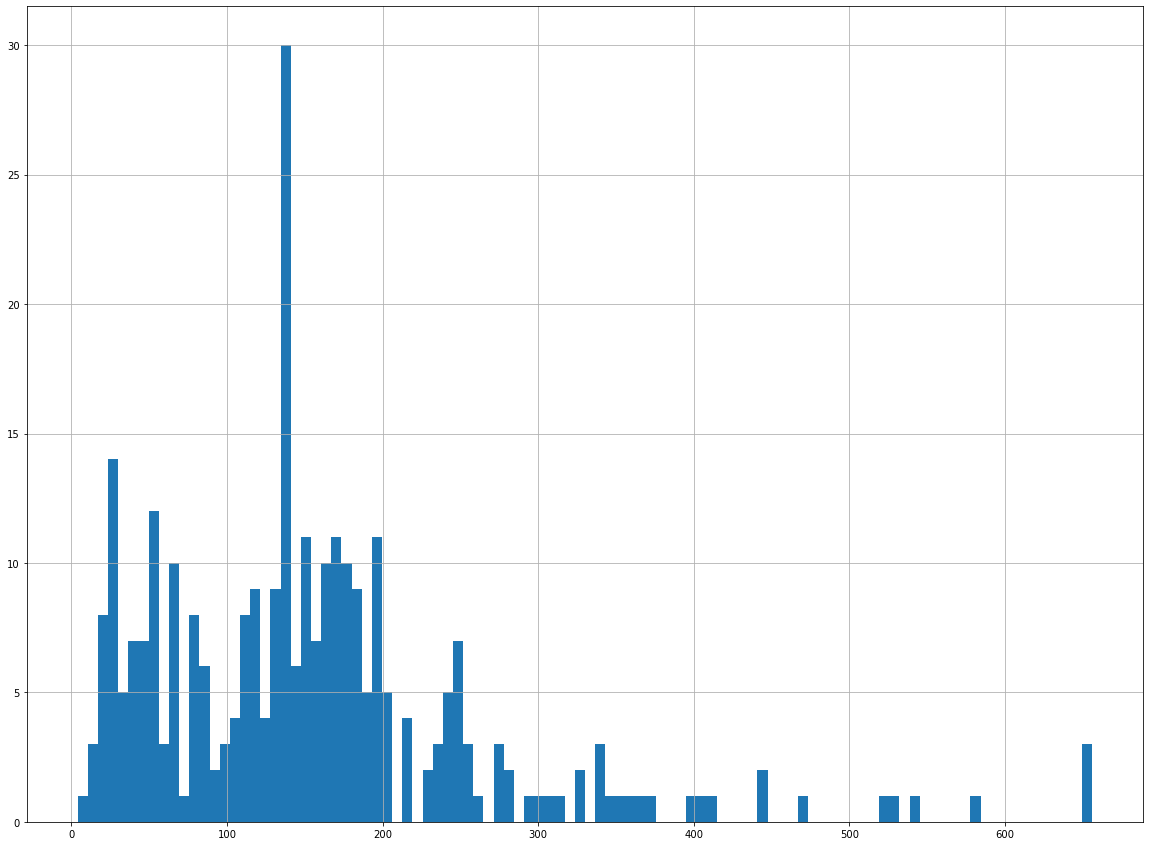

In [67]:
train2['bedCount'].hist(bins=100, figsize=(20,15))
plt.show()

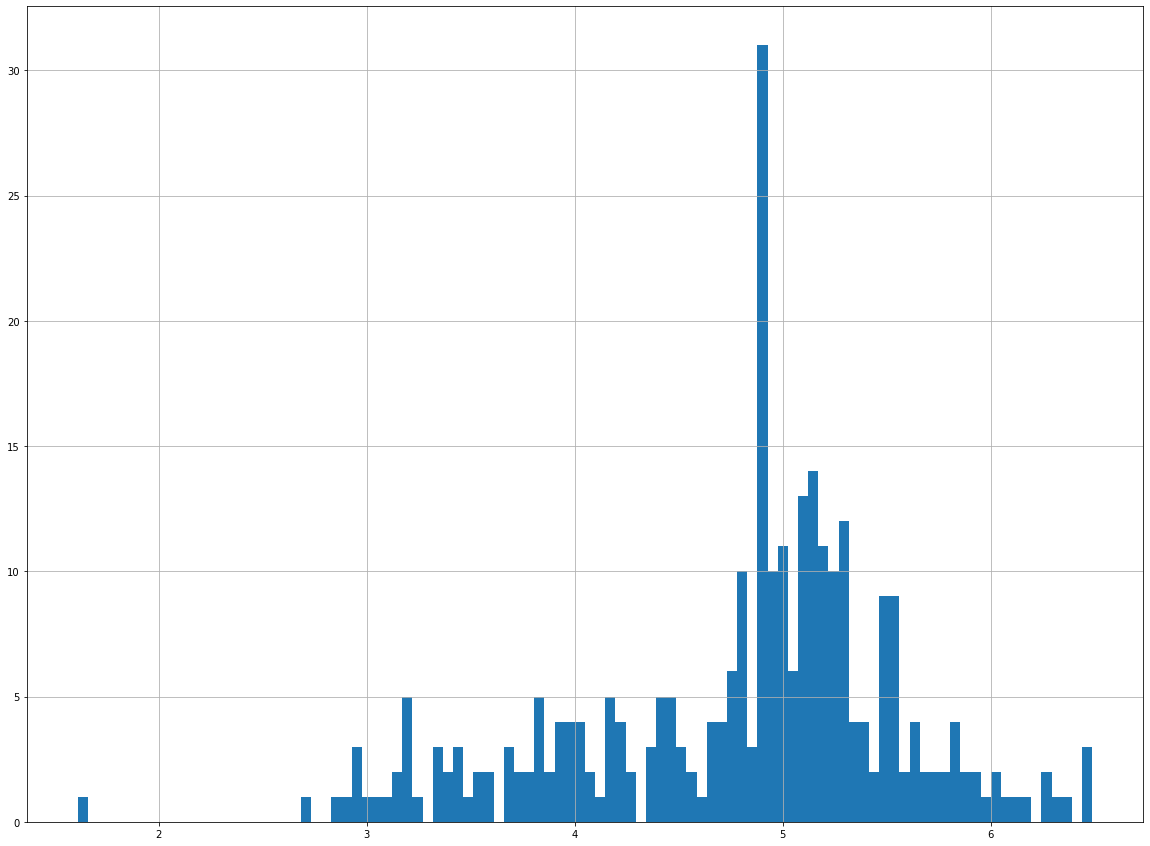

In [68]:
log_train2 = np.log1p(train2['bedCount'])
log_train2.hist(bins=100, figsize=(20,15))
plt.show()

In [69]:
box_train2 = stats.boxcox(train2['bedCount'])
box_train20 = pd.Series(box_train2[0])
box_train20

0      13.101424
1      18.151344
2      19.066246
3      17.161628
4      13.697437
         ...    
291    10.831246
292    17.414275
293    11.867498
294    14.174519
295    13.247580
Length: 296, dtype: float64

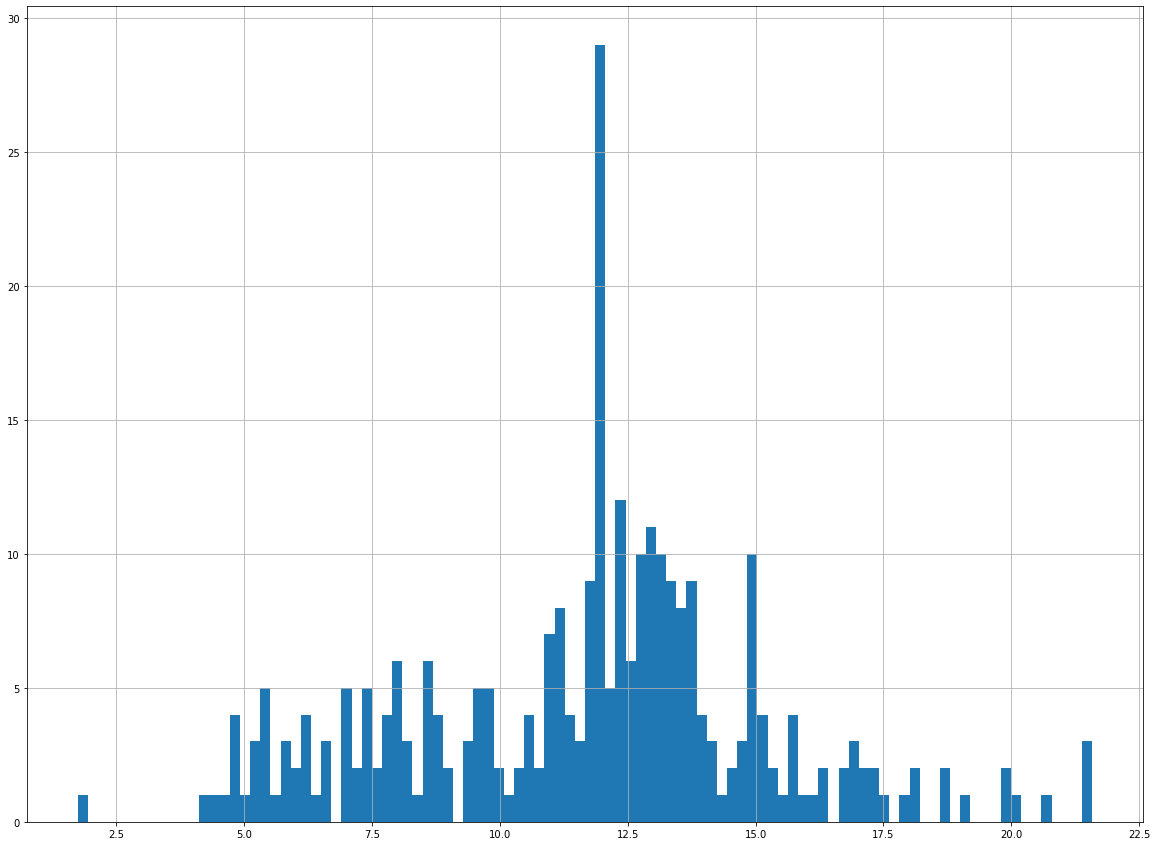

In [70]:
box_train20.hist(bins=100, figsize=(20,15))
plt.show()

In [71]:
train2['bedCount']

0      175.0
1      410.0
2      468.0
3      353.0
4      196.0
       ...  
291    109.0
292    367.0
293    136.5
294    214.0
295    180.0
Name: bedCount, Length: 296, dtype: float64

결과 => boxcox로 값을 분포시킨게 정규 분포가 가장 고르다!

In [72]:
stats.boxcox(train2['bedCount'],train2['revenue1'],train2['salescost1'])
stats.boxcox(train2['salary1'],train2['noi1'],train2['noe1'])
stats.boxcox(train2['interest1'],train2['ctax1'],train2['profit1'])
stats.boxcox(train2['liquidAsset1'],train2['quickAsset1'],train2['receivableS1'])
stats.boxcox(train2['inventoryAsset1'],train2['nonCAsset1'],train2['tanAsset1'])
stats.boxcox(train2['OnonCAsset1'],train2['receivableL1'],train2['debt1'])
stats.boxcox(train2['liquidLiabilities1'],train2['shortLoan1'],train2['NCLiabilities1'])
stats.boxcox(train2['longLoan1'],train2['netAsset1'],train2['surplus1'])
stats.boxcox(train2['revenue2'],train2['salescost2'],train2['sga2'])
stats.boxcox(train2['salary2'],train2['noi2'],train2['noe2'])
stats.boxcox(train2['interest2'],train2['ctax2'],train2['profit2'])
stats.boxcox(train2['liquidAsset2'],train2['quickAsset2'],train2['receivableS2'])
stats.boxcox(train2['inventoryAsset2'],train2['nonCAsset2'],train2['tanAsset2'])
stats.boxcox(train2['OnonCAsset2'],train2['receivableL2'],train2['debt2'])
stats.boxcox(train2['liquidLiabilities2'],train2['shortLoan2'],train2['NCLiabilities2'])
stats.boxcox(train2['longLoan2'],train2['netAsset2'],train2['surplus2'])
stats.boxcox(train2['employee1'],train2['employee2'],train2['days'])
stats.boxcox(train2['sga1'], train2['business profits1'], train2['business profits2'] )
stats.boxcox(train2['Debt ratio1'], train2['Debt ratio2'])

0       1.282994e+20
1      1.389620e+125
2       9.352332e+64
3       1.021167e+98
4      5.089492e+212
           ...      
291    9.372638e+263
292    1.043124e+119
293    6.887317e+133
294    2.095083e+272
295     1.756382e+21
Name: Debt ratio2, Length: 296, dtype: float64

In [73]:
box_train2 = stats.boxcox(train2['bedCount'])
train2['bedCount'] = pd.Series(box_train2[0])
train2['bedCount']

0      13.101424
1      18.151344
2      19.066246
3      17.161628
4      13.697437
         ...    
291    10.831246
292    17.414275
293    11.867498
294    14.174519
295    13.247580
Name: bedCount, Length: 296, dtype: float64

In [74]:
box_train2 = stats.boxcox(train2['revenue1'])
train2['revenue1'] = pd.Series(box_train2[0])
train2['revenue1']

0      62.949834
1      70.070410
2      54.602367
3      82.710033
4      79.712839
         ...    
291    63.074059
292    69.728207
293    64.605798
294    66.683565
295    58.816644
Name: revenue1, Length: 296, dtype: float64

In [75]:
box_train2 = stats.boxcox(train2['salescost1'])
train2['salescost1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salary1'])
train2['salary1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noi1'])
train2['noi1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noe1'])
train2['noe1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['interest1'])
train2['interest1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['ctax1'])
train2['ctax1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['profit1'])     # = 음수값이 있어 박스코스로 분포시키가 어려워서 제거
#train2['profit1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidAsset1'])
train2['liquidAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['quickAsset1'])
train2['quickAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['receivableS1'])
train2['receivableS1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['inventoryAsset1'])
train2['inventoryAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['nonCAsset1'])
train2['nonCAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['tanAsset1'])
train2['tanAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['OnonCAsset1'])
train2['OnonCAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['receivableL1'])
#train2['receivableL1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['debt1'])
train2['debt1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidLiabilities1'])
train2['liquidLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['shortLoan1'])
train2['shortLoan1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['NCLiabilities1'])
train2['NCLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['longLoan1'])
train2['longLoan1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['netAsset1'])
#train2['netAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['surplus1'])
#train2['surplus1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['revenue2'])
train2['revenue2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salescost2'])
train2['salescost2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['sga2'])
train2['sga2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salary2'])
train2['salary2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noi2'])
train2['noi2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noe2'])
train2['noe2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['interest2'])
train2['interest2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['ctax2'])
train2['ctax2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['profit2'])
#train2['profit2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidAsset2'])
train2['liquidAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['quickAsset2'])
train2['quickAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['receivableS2'])
train2['receivableS2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['inventoryAsset2'])
train2['inventoryAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['nonCAsset2'])
train2['nonCAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['tanAsset2'])
train2['tanAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['OnonCAsset2'])
train2['OnonCAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['receivableL2'])
#train2['receivableL2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['debt2'])
train2['debt2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidLiabilities2'])
train2['liquidLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['shortLoan2'])
train2['shortLoan2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['NCLiabilities2'])
train2['NCLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['longLoan2'])
train2['longLoan2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['netAsset2'])
#train2['netAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['surplus2'])
#train2['surplus2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['employee1'])
#train2['employee1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['employee2'])
#train2['employee2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['days'])
train2['days'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['sga1'])
train2['sga1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['business profits1'])
#train2['business profits1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['business profits2'])
#train2['business profits2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['Debt ratio1'])
train2['Debt ratio1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['Debt ratio2'])
train2['Debt ratio2'] = pd.Series(box_train2[0])

In [76]:
train2

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,1,1,13.101424,62.949834,36.807526,100.724974,15.791929,53.425822,73.435671,226.682849,...,1,0,0,0,0,1,-1.707083e+09,-1.569443e+09,2.561034,2.525262
1,3,1,18.151344,70.070410,36.807526,113.246364,16.313967,78.788473,128.951814,436.949536,...,0,0,0,0,0,1,5.331689e+08,6.576224e+08,3.719469,3.513842
2,4,1,19.066246,54.602367,33.277111,76.558801,14.752073,24.037680,24.709192,436.949536,...,1,0,0,0,0,1,4.181860e+07,6.576224e+08,2.075699,3.513842
3,7,1,17.161628,82.710033,36.807526,143.451143,17.175517,85.860594,148.988096,696.011007,...,0,0,0,0,0,1,-1.335340e+08,1.242746e+08,3.602891,3.373363
4,9,1,13.697437,79.712839,36.807526,136.744166,17.048560,70.122805,151.806550,711.392316,...,0,0,0,0,0,1,-5.759917e+08,-8.528666e+08,4.028570,3.802447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,10.831246,63.074059,31.380596,99.030190,15.839894,43.742993,116.638417,362.762651,...,0,0,0,0,0,1,6.049699e+08,5.103322e+08,4.119680,3.924358
292,419,1,17.414275,69.728207,33.352660,112.273070,16.323280,62.737993,146.899482,448.026248,...,1,0,0,0,0,1,2.027268e+09,1.474776e+09,3.709678,3.482152
293,420,1,11.867498,64.605798,36.807526,103.377987,15.930877,64.755741,123.466907,321.394413,...,1,0,0,0,0,1,-1.346862e+09,-1.190205e+09,3.859325,3.530180
294,422,1,14.174519,66.683565,32.727384,105.834805,16.069525,61.307564,137.130049,439.372232,...,1,0,0,0,0,1,1.296230e+09,-9.211679e+07,4.117088,3.944637


## profit1, receivableL1, netAsset1, surplus1, profit2, receivableL2, netAsset2, surplus2 => 음수값으로 인해 boxcox가 적용이 안돼서 log함수로 정규분포화

In [77]:
'''
np.log1p(train2['profit1'])
'''

"\nnp.log1p(train2['profit1'])\n"

In [78]:
'''
train2['profit1'] = np.log1p(train2['profit1'])
train2['receivableL1'] = np.log1p(train2['receivableL1'])
train2['netAsset1'] = np.log1p(train2['netAsset1'])
train2['surplus1'] = np.log1p(train2['surplus1'])
train2['receivableL2'] = np.log1p(train2['receivableL2'])
train2['netAsset2'] = np.log1p(train2['netAsset2'])
train2['surplus2'] = np.log1p(train2['surplus2'])
train2['employee1'] = np.log1p(train2['employee1'])
train2['employee2'] = np.log1p(train2['employee2'])
train2['business profits1'] = np.log1p(train2['business profits1'])
train2['business profits2'] = np.log1p(train2['business profits2'])
'''

"\ntrain2['profit1'] = np.log1p(train2['profit1'])\ntrain2['receivableL1'] = np.log1p(train2['receivableL1'])\ntrain2['netAsset1'] = np.log1p(train2['netAsset1'])\ntrain2['surplus1'] = np.log1p(train2['surplus1'])\ntrain2['receivableL2'] = np.log1p(train2['receivableL2'])\ntrain2['netAsset2'] = np.log1p(train2['netAsset2'])\ntrain2['surplus2'] = np.log1p(train2['surplus2'])\ntrain2['employee1'] = np.log1p(train2['employee1'])\ntrain2['employee2'] = np.log1p(train2['employee2'])\ntrain2['business profits1'] = np.log1p(train2['business profits1'])\ntrain2['business profits2'] = np.log1p(train2['business profits2'])\n"

In [79]:
train2.tail()

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
291,418,1,10.831246,63.074059,31.380596,99.030190,15.839894,43.742993,116.638417,362.762651,...,0,0,0,0,0,1,6.049699e+08,5.103322e+08,4.119680,3.924358
292,419,1,17.414275,69.728207,33.352660,112.273070,16.323280,62.737993,146.899482,448.026248,...,1,0,0,0,0,1,2.027268e+09,1.474776e+09,3.709678,3.482152
293,420,1,11.867498,64.605798,36.807526,103.377987,15.930877,64.755741,123.466907,321.394413,...,1,0,0,0,0,1,-1.346862e+09,-1.190205e+09,3.859325,3.530180
294,422,1,14.174519,66.683565,32.727384,105.834805,16.069525,61.307564,137.130049,439.372232,...,1,0,0,0,0,1,1.296230e+09,-9.211679e+07,4.117088,3.944637
295,427,0,13.247580,58.816644,31.630831,98.411549,15.840605,71.042153,130.234822,564.493172,...,1,0,0,0,1,0,-1.437527e+09,-1.139978e+09,2.998595,2.429485


### 2 - 10) test데이터에 적용

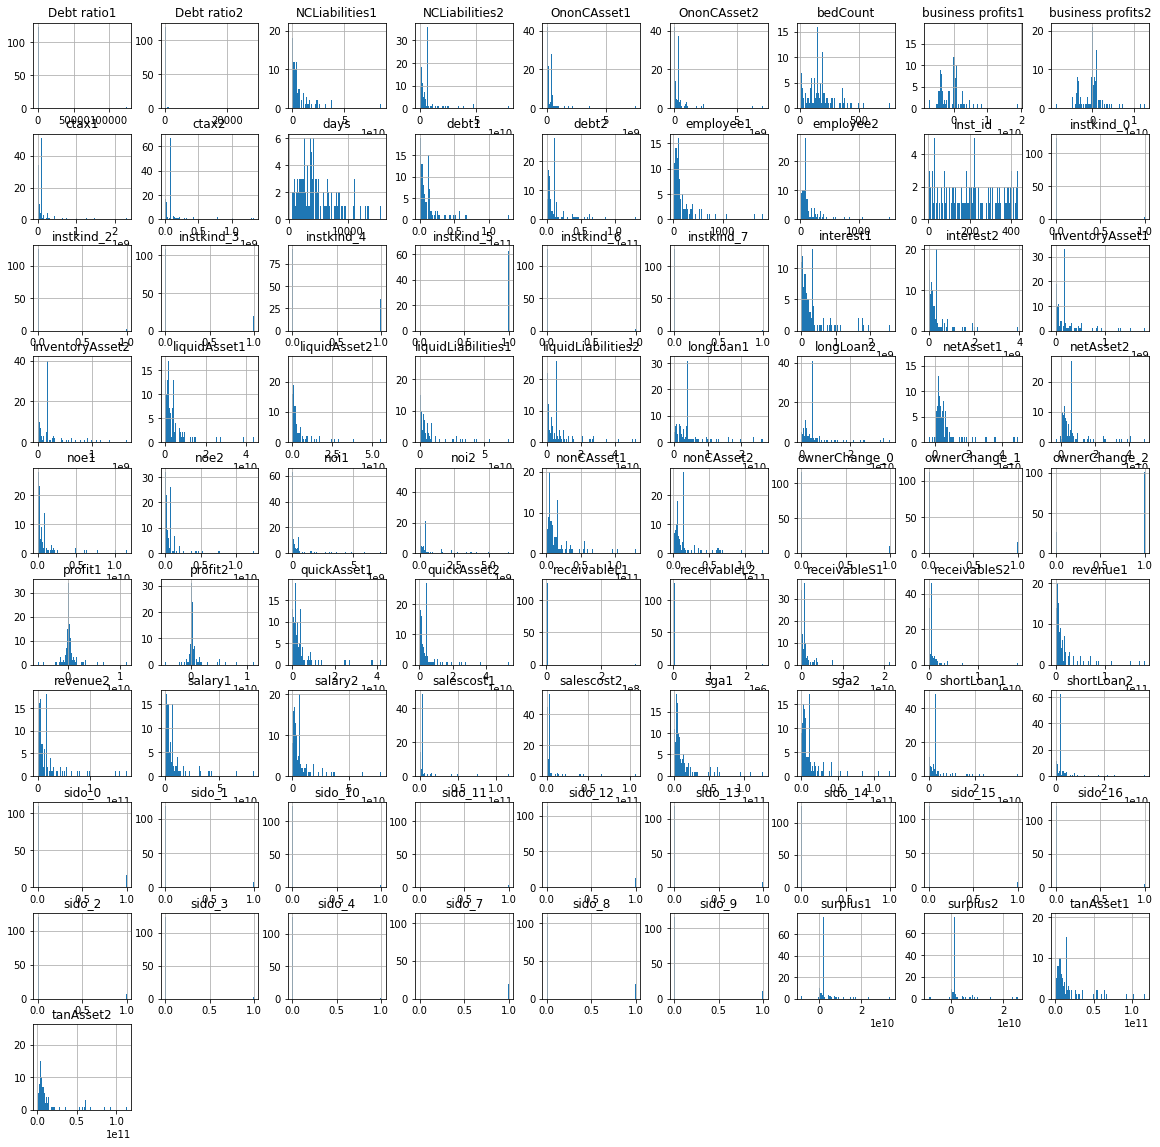

In [80]:
test2.hist(bins=100, figsize=(20,20))
plt.show()

In [81]:
stats.boxcox(test2['bedCount'],test2['revenue1'],test2['salescost1'])
stats.boxcox(test2['salary1'],test2['noi1'],test2['noe1'])
stats.boxcox(test2['interest1'],test2['ctax1'],test2['profit1'])
stats.boxcox(test2['liquidAsset1'],test2['quickAsset1'],test2['receivableS1'])
stats.boxcox(test2['inventoryAsset1'],test2['nonCAsset1'],test2['tanAsset1'])
stats.boxcox(test2['OnonCAsset1'],test2['receivableL1'],test2['debt1'])
stats.boxcox(test2['liquidLiabilities1'],test2['shortLoan1'],test2['NCLiabilities1'])
stats.boxcox(test2['longLoan1'],test2['netAsset1'],test2['surplus1'])
stats.boxcox(test2['revenue2'],test2['salescost2'],test2['sga2'])
stats.boxcox(test2['salary2'],test2['noi2'],test2['noe2'])
stats.boxcox(test2['interest2'],test2['ctax2'],test2['profit2'])
stats.boxcox(test2['liquidAsset2'],test2['quickAsset2'],test2['receivableS2'])
stats.boxcox(test2['inventoryAsset2'],test2['nonCAsset2'],test2['tanAsset2'])
stats.boxcox(test2['OnonCAsset2'],test2['receivableL2'],test2['debt2'])
stats.boxcox(test2['liquidLiabilities2'],test2['shortLoan2'],test2['NCLiabilities2'])
stats.boxcox(test2['longLoan2'],test2['netAsset2'],test2['surplus2'])
stats.boxcox(test2['employee1'],test2['employee2'],test2['days'])
stats.boxcox(test2['sga1'], test2['business profits1'], test2['business profits2'])
stats.boxcox(test2['Debt ratio1'], test2['Debt ratio2'])

0      5.899972e+172
1                inf
2       3.158418e+81
3      1.385994e+161
4      1.375244e+199
           ...      
122    2.114914e+127
123     6.294867e+15
124    1.466642e+174
125    2.618358e+146
126    5.505971e+215
Name: Debt ratio2, Length: 127, dtype: float64

In [82]:
box_train2 = stats.boxcox(test2['salescost1'])
test2['salescost1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salary1'])
test2['salary1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noi1'])
test2['noi1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noe1'])
test2['noe1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['interest1'])
test2['interest1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['ctax1'])
test2['ctax1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['profit1'])     # = 음수값이 있어 박스코스로 분포시키가 어려워서 제거
#test2['profit1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidAsset1'])
test2['liquidAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['quickAsset1'])
test2['quickAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['receivableS1'])
test2['receivableS1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['inventoryAsset1'])
test2['inventoryAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['nonCAsset1'])
test2['nonCAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['tanAsset1'])
test2['tanAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['OnonCAsset1'])
test2['OnonCAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['receivableL1'])
#test2['receivableL1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['debt1'])
test2['debt1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidLiabilities1'])
test2['liquidLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['shortLoan1'])
test2['shortLoan1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['NCLiabilities1'])
test2['NCLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['longLoan1'])
test2['longLoan1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['netAsset1'])
#test2['netAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['surplus1'])
#test2['surplus1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['revenue2'])
test2['revenue2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salescost2'])
test2['salescost2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['sga2'])
test2['sga2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salary2'])
test2['salary2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noi2'])
test2['noi2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noe2'])
test2['noe2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['interest2'])
test2['interest2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['ctax2'])
test2['ctax2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['profit2'])
#test2['profit2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidAsset2'])
test2['liquidAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['quickAsset2'])
test2['quickAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['receivableS2'])
test2['receivableS2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['inventoryAsset2'])
test2['inventoryAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['nonCAsset2'])
test2['nonCAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['tanAsset2'])
test2['tanAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['OnonCAsset2'])
test2['OnonCAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['receivableL2'])
#test2['receivableL2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['debt2'])
test2['debt2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidLiabilities2'])
test2['liquidLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['shortLoan2'])
test2['shortLoan2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['NCLiabilities2'])
test2['NCLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['longLoan2'])
test2['longLoan2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['netAsset2'])
#test2['netAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['surplus2'])
#test2['surplus2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['employee1'])
#test2['employee1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['employee2'])
#test2['employee2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['days'])
test2['days'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['sga1'])
test2['sga1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['business profits1'])
#test2['business profits1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['business profits2'])
#test2['business profits2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['Debt ratio1'])
test2['Debt ratio1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['Debt ratio2'])
test2['Debt ratio2'] = pd.Series(box_train2[0])

In [83]:
'''
test2['profit1'] = np.log1p(test2['profit1'])
test2['receivableL1'] = np.log1p(test2['receivableL1'])
test2['netAsset1'] = np.log1p(test2['netAsset1'])
test2['surplus1'] = np.log1p(test2['surplus1'])
test2['receivableL2'] = np.log1p(test2['receivableL2'])
test2['netAsset2'] = np.log1p(test2['netAsset2'])
test2['surplus2'] = np.log1p(test2['surplus2'])
test2['employee1'] = np.log1p(test2['employee1'])
test2['employee2'] = np.log1p(test2['employee2'])
test2['business profits1'] = np.log1p(test2['business profits1'])
test2['business profits2'] = np.log1p(test2['business profits2'])
'''

"\ntest2['profit1'] = np.log1p(test2['profit1'])\ntest2['receivableL1'] = np.log1p(test2['receivableL1'])\ntest2['netAsset1'] = np.log1p(test2['netAsset1'])\ntest2['surplus1'] = np.log1p(test2['surplus1'])\ntest2['receivableL2'] = np.log1p(test2['receivableL2'])\ntest2['netAsset2'] = np.log1p(test2['netAsset2'])\ntest2['surplus2'] = np.log1p(test2['surplus2'])\ntest2['employee1'] = np.log1p(test2['employee1'])\ntest2['employee2'] = np.log1p(test2['employee2'])\ntest2['business profits1'] = np.log1p(test2['business profits1'])\ntest2['business profits2'] = np.log1p(test2['business profits2'])\n"

In [84]:
test2

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,2,300.00,6.682486e+10,74.679712,1154.153398,50.822846,59.886938,107.963925,74.751442,79.666663,...,0,0,0,0,0,1,-2.742976e+09,-2.592398e+09,3.802458,4.189100
1,5,44.00,3.495758e+10,74.679712,986.620818,48.367525,39.749694,96.235510,75.492153,84.390012,...,0,0,0,0,0,1,-1.545870e+09,-4.727591e+09,4.210423,4.816317
2,6,276.00,2.326031e+10,71.281834,913.271001,47.064469,54.457093,91.899536,68.322097,84.390012,...,0,0,0,0,1,0,-2.369750e+09,-5.592507e+08,3.403173,3.650900
3,8,363.00,1.795715e+10,74.679712,805.600802,45.390592,60.557813,96.722195,61.155738,84.390012,...,0,0,0,0,0,1,8.533893e+08,9.039969e+08,4.106407,4.043869
4,10,213.00,5.037025e+10,74.679712,1078.769142,49.542800,54.230600,86.437574,77.972640,84.390012,...,0,0,0,0,0,1,-2.098526e+09,-7.730316e+08,3.778305,4.319414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,136.75,2.233031e+10,63.220423,868.958029,47.255308,47.799574,91.234708,63.281502,102.193142,...,0,1,0,0,1,0,2.989286e+09,3.490860e+09,3.559851,3.993935
123,425,156.00,1.833906e+10,74.679712,859.388233,45.155369,36.629133,53.052388,44.245924,110.018369,...,0,0,1,0,0,1,-3.172852e+09,-2.717027e+09,2.131812,2.698688
124,429,150.00,1.424266e+10,68.341382,780.971810,44.865022,36.074392,86.489466,68.674921,64.368035,...,0,0,0,0,1,0,1.029267e+09,8.372569e+08,3.741065,4.213694
125,430,156.00,4.892710e+10,96.007725,639.705062,40.105826,40.637861,90.919901,68.588229,69.839614,...,0,0,0,0,0,1,2.634129e+09,2.365026e+09,3.633266,4.094006


## 3. 모델 ( Logistic Regression )

### 3 - 1) 모델 변수 준비

In [85]:
test2

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,2,300.00,6.682486e+10,74.679712,1154.153398,50.822846,59.886938,107.963925,74.751442,79.666663,...,0,0,0,0,0,1,-2.742976e+09,-2.592398e+09,3.802458,4.189100
1,5,44.00,3.495758e+10,74.679712,986.620818,48.367525,39.749694,96.235510,75.492153,84.390012,...,0,0,0,0,0,1,-1.545870e+09,-4.727591e+09,4.210423,4.816317
2,6,276.00,2.326031e+10,71.281834,913.271001,47.064469,54.457093,91.899536,68.322097,84.390012,...,0,0,0,0,1,0,-2.369750e+09,-5.592507e+08,3.403173,3.650900
3,8,363.00,1.795715e+10,74.679712,805.600802,45.390592,60.557813,96.722195,61.155738,84.390012,...,0,0,0,0,0,1,8.533893e+08,9.039969e+08,4.106407,4.043869
4,10,213.00,5.037025e+10,74.679712,1078.769142,49.542800,54.230600,86.437574,77.972640,84.390012,...,0,0,0,0,0,1,-2.098526e+09,-7.730316e+08,3.778305,4.319414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,136.75,2.233031e+10,63.220423,868.958029,47.255308,47.799574,91.234708,63.281502,102.193142,...,0,1,0,0,1,0,2.989286e+09,3.490860e+09,3.559851,3.993935
123,425,156.00,1.833906e+10,74.679712,859.388233,45.155369,36.629133,53.052388,44.245924,110.018369,...,0,0,1,0,0,1,-3.172852e+09,-2.717027e+09,2.131812,2.698688
124,429,150.00,1.424266e+10,68.341382,780.971810,44.865022,36.074392,86.489466,68.674921,64.368035,...,0,0,0,0,1,0,1.029267e+09,8.372569e+08,3.741065,4.213694
125,430,156.00,4.892710e+10,96.007725,639.705062,40.105826,40.637861,90.919901,68.588229,69.839614,...,0,0,0,0,0,1,2.634129e+09,2.365026e+09,3.633266,4.094006


In [173]:
test3 = test2.drop(['noi1','revenue1','profit1','noe1','noi2','noe2','netAsset2','surplus2','business profits1','business profits2','sido_0','Debt ratio1','Debt ratio2', 'inst_id','receivableS1','receivableS2','receivableL2','receivableL1','sido_1','sido_2','sido_3','sido_4','sido_7','sido_8','sido_9','sido_10','sido_11','sido_12','sido_13','sido_14','sido_15','sido_16','instkind_0','instkind_2','instkind_3','instkind_4','instkind_5','instkind_6','instkind_7','ownerChange_0','ownerChange_1','ownerChange_2'],axis = 1)
test3

,bedCount,salescost1,sga1,salary1,interest1,ctax1,liquidAsset1,quickAsset1,inventoryAsset1,nonCAsset1,...,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days
0,300.00,74.679712,1154.153398,50.822846,74.751442,79.666663,85.682026,80.139012,343.419601,7.897429,...,8.140028,78.426236,144.445776,160.080666,253.597270,167.033974,156.167341,693.0,693.0,31.107067
1,44.00,74.679712,986.620818,48.367525,75.492153,84.390012,73.511208,68.875510,272.256412,7.920132,...,8.163443,47.077561,147.952430,156.287594,237.318529,214.811528,190.658898,379.0,371.0,17.836489
2,276.00,71.281834,913.271001,47.064469,68.322097,84.390012,79.607530,74.252973,333.082045,7.871066,...,8.112830,72.629121,119.115460,148.097287,233.544823,174.847683,154.769406,100.0,85.0,34.565283
3,363.00,74.679712,805.600802,45.390592,61.155738,84.390012,76.536058,71.600039,297.325118,7.914660,...,8.128709,70.705824,119.620763,128.900438,181.053071,152.272771,154.769406,760.0,760.0,24.799763
4,213.00,74.679712,1078.769142,49.542800,77.972640,84.390012,75.775176,70.880693,293.881460,7.912166,...,8.158665,74.856577,140.377484,124.958164,174.003517,226.950779,194.993407,437.0,385.0,28.488667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136.75,63.220423,868.958029,47.255308,63.281502,102.193142,82.681766,77.836785,199.898626,7.823800,...,8.056613,69.756529,123.482301,134.022090,162.683959,153.945018,154.769406,560.0,85.0,29.821900
123,156.00,74.679712,859.388233,45.155369,44.245924,110.018369,70.075871,66.330045,220.641832,7.791132,...,8.018269,62.740765,101.118023,99.869342,162.683959,144.362868,134.896751,132.0,137.0,29.995560
124,150.00,68.341382,780.971810,44.865022,68.674921,64.368035,71.257244,67.122398,220.641832,7.835224,...,8.064399,70.705824,119.115460,120.034376,162.683959,174.847683,154.769406,100.0,85.0,30.184038
125,156.00,96.007725,639.705062,40.105826,68.588229,69.839614,77.922125,72.554622,331.322975,7.871189,...,8.028616,102.439795,137.511451,126.914818,162.683959,219.035476,200.264191,363.0,343.0,30.145094


In [124]:
train2

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2,business profits1,business profits2,Debt ratio1,Debt ratio2
0,1,1,13.101424,62.949834,36.807526,100.724974,15.791929,53.425822,73.435671,226.682849,...,1,0,0,0,0,1,-1.707083e+09,-1.569443e+09,2.561034,2.525262
1,3,1,18.151344,70.070410,36.807526,113.246364,16.313967,78.788473,128.951814,436.949536,...,0,0,0,0,0,1,5.331689e+08,6.576224e+08,3.719469,3.513842
2,4,1,19.066246,54.602367,33.277111,76.558801,14.752073,24.037680,24.709192,436.949536,...,1,0,0,0,0,1,4.181860e+07,6.576224e+08,2.075699,3.513842
3,7,1,17.161628,82.710033,36.807526,143.451143,17.175517,85.860594,148.988096,696.011007,...,0,0,0,0,0,1,-1.335340e+08,1.242746e+08,3.602891,3.373363
4,9,1,13.697437,79.712839,36.807526,136.744166,17.048560,70.122805,151.806550,711.392316,...,0,0,0,0,0,1,-5.759917e+08,-8.528666e+08,4.028570,3.802447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,10.831246,63.074059,31.380596,99.030190,15.839894,43.742993,116.638417,362.762651,...,0,0,0,0,0,1,6.049699e+08,5.103322e+08,4.119680,3.924358
292,419,1,17.414275,69.728207,33.352660,112.273070,16.323280,62.737993,146.899482,448.026248,...,1,0,0,0,0,1,2.027268e+09,1.474776e+09,3.709678,3.482152
293,420,1,11.867498,64.605798,36.807526,103.377987,15.930877,64.755741,123.466907,321.394413,...,1,0,0,0,0,1,-1.346862e+09,-1.190205e+09,3.859325,3.530180
294,422,1,14.174519,66.683565,32.727384,105.834805,16.069525,61.307564,137.130049,439.372232,...,1,0,0,0,0,1,1.296230e+09,-9.211679e+07,4.117088,3.944637


In [174]:
train3 = train2.drop(['revenue1','profit1','noi1','noe1','noi2','noe2','sido_0','netAsset2','surplus2','sido_1','business profits1','business profits2','Debt ratio1','Debt ratio2', 'inst_id','receivableS1','receivableS2','receivableL2','receivableL1','sido_2','sido_3','sido_4','sido_5','sido_6','sido_7','sido_8','sido_9','sido_10','sido_12','sido_13','sido_14','sido_15','sido_16','instkind_0','instkind_1','instkind_3','instkind_4','instkind_5','instkind_6','instkind_7','ownerChange_0','ownerChange_1','ownerChange_2'],axis = 1)
train3

,OC,bedCount,salescost1,sga1,salary1,interest1,ctax1,liquidAsset1,quickAsset1,inventoryAsset1,...,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days
0,1,13.101424,36.807526,100.724974,15.791929,226.682849,175.580720,104.866071,103.827608,36.109392,...,31.001881,98.886288,96.149408,128.466652,962.731832,885.868445,314.304816,62.0,64.0,21.756557
1,1,18.151344,36.807526,113.246364,16.313967,436.949536,213.081198,124.312797,122.672439,45.098657,...,33.800113,111.579011,132.080368,205.564846,962.731832,1578.068634,476.044613,801.0,813.0,25.730631
2,1,19.066246,33.277111,76.558801,14.752073,436.949536,213.081198,87.310107,85.814752,37.019345,...,33.800113,111.579011,132.080368,205.564846,962.731832,1578.068634,476.044613,234.0,1.0,13.933526
3,1,17.161628,36.807526,143.451143,17.175517,696.011007,253.385667,148.874678,145.094228,59.021889,...,36.551011,163.747918,162.224249,262.903051,1555.424910,2412.004838,691.223318,663.0,663.0,24.695930
4,1,13.697437,36.807526,136.744166,17.048560,711.392316,213.081198,134.884287,132.390161,52.046514,...,37.134890,128.306977,168.972859,288.510021,1843.156024,2431.646317,681.207493,206.0,197.0,22.818230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,10.831246,31.380596,99.030190,15.839894,362.762651,213.081198,93.697450,92.809309,32.805731,...,33.263342,81.530186,124.216768,198.761166,962.731832,1265.810801,443.779564,75.0,70.0,19.262772
292,1,17.414275,33.352660,112.273070,16.323280,448.026248,310.186314,124.045437,122.712586,41.938713,...,34.432542,86.524959,130.183273,167.604840,621.023740,1724.573762,564.591196,180.0,180.0,20.173675
293,1,11.867498,36.807526,103.377987,15.930877,321.394413,194.173199,125.701170,124.567743,36.152179,...,32.597661,111.579011,120.135527,155.889483,962.731832,1450.033989,437.377085,62.0,66.0,19.820544
294,1,14.174519,32.727384,105.834805,16.069525,439.372232,213.081198,120.524930,119.479566,33.149995,...,34.305843,89.476418,134.962169,193.380669,962.731832,1777.853261,565.413809,193.0,141.0,23.049146


### 3 - 2) 훈련데이터 x, y를 만듬

#### 훈련용 데이터

In [175]:
train3_x = train3.drop('OC', axis = 1)

In [176]:
train3_x = np.asarray(train3_x)

In [177]:
train3_x

array([[ 13.10142392,  36.80752624, 100.72497432, ...,  62.        ,
         64.        ,  21.7565575 ],
       [ 18.15134378,  36.80752624, 113.24636395, ..., 801.        ,
        813.        ,  25.73063058],
       [ 19.06624576,  33.27711147,  76.55880089, ..., 234.        ,
          1.        ,  13.93352599],
       ...,
       [ 11.86749798,  36.80752624, 103.37798744, ...,  62.        ,
         66.        ,  19.8205438 ],
       [ 14.17451874,  32.72738434, 105.83480472, ..., 193.        ,
        141.        ,  23.0491461 ],
       [ 13.24757956,  31.63083088,  98.41154894, ..., 100.        ,
         76.5       ,  22.22842671]])

In [178]:
train3_y = train3['OC']

In [143]:
#train4_x = stats.zscore(train3_x)

In [144]:
#train4_x

array([[ 0.40702989, -0.43172055,  0.49148328, ..., -0.50617843,
        -0.46943333, -0.05194004],
       [ 1.84947882,  0.50878227,  0.49148328, ...,  4.16077599,
         4.57541631,  1.02336059],
       [ 2.11080958, -1.53427412, -0.45322807, ...,  0.58004101,
        -0.89376648, -2.16868791],
       ...,
       [ 0.05457377, -0.21299686,  0.49148328, ..., -0.50617843,
        -0.45596244, -0.57578465],
       [ 0.71354653,  0.06143956, -0.60033075, ...,  0.32111661,
         0.04919607,  0.29780726],
       [ 0.44877749, -0.97764225, -0.89375987, ..., -0.26619971,
        -0.38524025,  0.07573785]])

테스트용 데이터


In [183]:
test3['OC'] = ''

In [184]:
test3_x = test3.drop('OC', axis = 1)
test3_x = np.asarray(test3_x)
test3_x
#test4_x = stats.zscore(test3_x)
#test4_x

array([[ 300.        ,   74.67971152, 1154.15339756, ...,  693.        ,
         693.        ,   31.10706677],
       [  44.        ,   74.67971152,  986.62081817, ...,  379.        ,
         371.        ,   17.83648898],
       [ 276.        ,   71.28183448,  913.27100081, ...,  100.        ,
          85.        ,   34.56528277],
       ...,
       [ 150.        ,   68.34138233,  780.97180978, ...,  100.        ,
          85.        ,   30.18403825],
       [ 156.        ,   96.00772519,  639.70506151, ...,  363.        ,
         343.        ,   30.14509414],
       [  96.        ,   65.486988  ,  733.9574388 , ...,  100.        ,
          85.        ,   31.89612464]])

In [185]:
test3_x

array([[ 300.        ,   74.67971152, 1154.15339756, ...,  693.        ,
         693.        ,   31.10706677],
       [  44.        ,   74.67971152,  986.62081817, ...,  379.        ,
         371.        ,   17.83648898],
       [ 276.        ,   71.28183448,  913.27100081, ...,  100.        ,
          85.        ,   34.56528277],
       ...,
       [ 150.        ,   68.34138233,  780.97180978, ...,  100.        ,
          85.        ,   30.18403825],
       [ 156.        ,   96.00772519,  639.70506151, ...,  363.        ,
         343.        ,   30.14509414],
       [  96.        ,   65.486988  ,  733.9574388 , ...,  100.        ,
          85.        ,   31.89612464]])

In [186]:
test4_y = test3['OC']

### 3 - 3) 훈련

In [187]:
model = Sequential()
model.add( Dense( 1, input_dim = 40, activation = 'sigmoid' ) )   # 로지스틱은 시그모이드를 사용, 선형은 linear
sgd = optimizers.SGD( lr = 0.001 )
model.compile( optimizer = sgd, loss = 'binary_crossentropy',    # 로지스틱은 loss = 'binary_crossentropy', 선형은 loss = MSE
               metrics = ['binary_accuracy'] )
hist = model.fit(train3_x, train4_y, batch_size = 1, epochs = 150, shuffle = False )

Train on 296 samples
Epoch 1/150
296/296 [==============================] - 0s 2ms/sample - loss: 5296419040607185.0000 - binary_accuracy: 0.8615
Epoch 2/150
296/296 [==============================] - 0s 816us/sample - loss: 8259986280769481.0000 - binary_accuracy: 0.9020
Epoch 3/150
296/296 [==============================] - 0s 816us/sample - loss: 7505223801507287.0000 - binary_accuracy: 0.9088
Epoch 4/150
296/296 [==============================] - 0s 839us/sample - loss: 6660381472832208.0000 - binary_accuracy: 0.9020 - loss: 4036318789298362.0000 - binary_accuracy: 0.
Epoch 5/150
296/296 [==============================] - 0s 798us/sample - loss: 7468079487839038.0000 - binary_accuracy: 0.9020
Epoch 6/150
296/296 [==============================] - 0s 815us/sample - loss: 6711161944007763.0000 - binary_accuracy: 0.8682
Epoch 7/150
296/296 [==============================] - 0s 797us/sample - loss: 7455530010563335.0000 - binary_accuracy: 0.9122
Epoch 8/150
296/296 [===================

296/296 [==============================] - 0s 796us/sample - loss: 5685792378036002.0000 - binary_accuracy: 0.8986
Epoch 64/150
296/296 [==============================] - 0s 803us/sample - loss: 8287063862978062.0000 - binary_accuracy: 0.8953
Epoch 65/150
296/296 [==============================] - 0s 793us/sample - loss: 7479300286238610.0000 - binary_accuracy: 0.8986
Epoch 66/150
296/296 [==============================] - 0s 807us/sample - loss: 7800833995553487.0000 - binary_accuracy: 0.8919
Epoch 67/150
296/296 [==============================] - 0s 780us/sample - loss: 7526470315494428.0000 - binary_accuracy: 0.9054
Epoch 68/150
296/296 [==============================] - 0s 771us/sample - loss: 6717891019403817.0000 - binary_accuracy: 0.9020
Epoch 69/150
296/296 [==============================] - 0s 806us/sample - loss: 8276618622448612.0000 - binary_accuracy: 0.8953
Epoch 70/150
296/296 [==============================] - 0s 770us/sample - loss: 8197014421362300.0000 - binary_accura

296/296 [==============================] - 0s 795us/sample - loss: 8268809487954916.0000 - binary_accuracy: 0.8885
Epoch 126/150
296/296 [==============================] - 0s 797us/sample - loss: 8286491657208694.0000 - binary_accuracy: 0.8986
Epoch 127/150
296/296 [==============================] - 0s 777us/sample - loss: 7472229524021026.0000 - binary_accuracy: 0.9122
Epoch 128/150
296/296 [==============================] - 0s 782us/sample - loss: 7917661906460008.0000 - binary_accuracy: 0.8986
Epoch 129/150
296/296 [==============================] - 0s 805us/sample - loss: 8283883470075739.0000 - binary_accuracy: 0.9054
Epoch 130/150
296/296 [==============================] - 0s 786us/sample - loss: 7481920048517010.0000 - binary_accuracy: 0.9088
Epoch 131/150
296/296 [==============================] - 0s 768us/sample - loss: 6663531080450048.0000 - binary_accuracy: 0.9054
Epoch 132/150
296/296 [==============================] - 0s 779us/sample - loss: 7399889816766630.0000 - binary

### 3 - 4) 모델 그래프

In [188]:
loss = hist.history[ 'loss' ]
epochs = range(1, len(loss)+1)

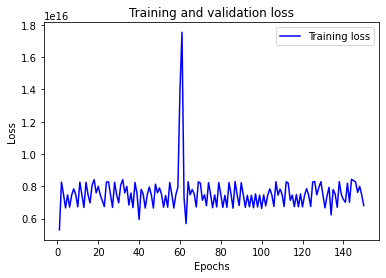

In [189]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [192]:
predict = model.predict(test3_x)
predict

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [193]:
test3['OC'] = predict

In [194]:
test3 = pd.concat([test3, test2['inst_id']], axis = 1 )
test3

,bedCount,salescost1,sga1,salary1,interest1,ctax1,liquidAsset1,quickAsset1,inventoryAsset1,nonCAsset1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days,OC,inst_id
0,300.00,74.679712,1154.153398,50.822846,74.751442,79.666663,85.682026,80.139012,343.419601,7.897429,...,144.445776,160.080666,253.597270,167.033974,156.167341,693.0,693.0,31.107067,1.0,2
1,44.00,74.679712,986.620818,48.367525,75.492153,84.390012,73.511208,68.875510,272.256412,7.920132,...,147.952430,156.287594,237.318529,214.811528,190.658898,379.0,371.0,17.836489,1.0,5
2,276.00,71.281834,913.271001,47.064469,68.322097,84.390012,79.607530,74.252973,333.082045,7.871066,...,119.115460,148.097287,233.544823,174.847683,154.769406,100.0,85.0,34.565283,1.0,6
3,363.00,74.679712,805.600802,45.390592,61.155738,84.390012,76.536058,71.600039,297.325118,7.914660,...,119.620763,128.900438,181.053071,152.272771,154.769406,760.0,760.0,24.799763,1.0,8
4,213.00,74.679712,1078.769142,49.542800,77.972640,84.390012,75.775176,70.880693,293.881460,7.912166,...,140.377484,124.958164,174.003517,226.950779,194.993407,437.0,385.0,28.488667,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136.75,63.220423,868.958029,47.255308,63.281502,102.193142,82.681766,77.836785,199.898626,7.823800,...,123.482301,134.022090,162.683959,153.945018,154.769406,560.0,85.0,29.821900,1.0,424
123,156.00,74.679712,859.388233,45.155369,44.245924,110.018369,70.075871,66.330045,220.641832,7.791132,...,101.118023,99.869342,162.683959,144.362868,134.896751,132.0,137.0,29.995560,1.0,425
124,150.00,68.341382,780.971810,44.865022,68.674921,64.368035,71.257244,67.122398,220.641832,7.835224,...,119.115460,120.034376,162.683959,174.847683,154.769406,100.0,85.0,30.184038,1.0,429
125,156.00,96.007725,639.705062,40.105826,68.588229,69.839614,77.922125,72.554622,331.322975,7.871189,...,137.511451,126.914818,162.683959,219.035476,200.264191,363.0,343.0,30.145094,1.0,430


In [195]:
test3[['inst_id', 'OC']].to_csv('submission_sample.csv', index=False, float_format='%.14f')

In [155]:
test4_x.shape

(296, 50)

In [268]:
test3

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days,business profits1,business profits2,OC
0,300.00,6.682486e+10,74.679712,1154.153398,50.822849,59.886938,107.963911,74.751442,79.666663,5.036692e+08,85.682026,80.139012,343.419601,7.897429,7.833229,59.321149,238.780371,82.081045,158.868030,375.117299,333.805072,6.295769e+09,8.944587e+09,76.116958,75.740940,34.873100,45.477253,141.897274,74.464268,96.846637,269.708577,5.181821e+08,62.979537,35.848192,310.002228,8.736598,8.140028,78.426236,144.445776,160.080666,253.597270,167.033974,156.167341,1.608540e+10,8.944587e+09,693.0,693.0,31.107067,-2.742976e+09,-2.592398e+09,0.930303
1,44.00,3.495758e+10,74.679712,986.620818,48.367527,39.749694,96.235498,75.492153,84.390012,4.525557e+08,73.511208,68.875510,272.256412,7.920132,7.851520,33.221976,238.036376,80.114910,148.973502,417.953377,402.006476,1.470447e+10,1.046277e+10,72.543390,75.740940,33.963264,44.018936,91.115796,73.205210,99.968692,217.322525,-4.645265e+09,55.132048,32.569487,261.543070,8.761603,8.163443,47.077561,147.952430,156.287594,237.318529,214.811528,190.658898,3.789135e+09,1.622514e+09,379.0,371.0,17.836489,-1.545870e+09,-4.727591e+09,0.933366
2,276.00,2.326031e+10,71.281834,913.271001,47.064471,54.457093,91.899525,68.322097,84.390012,-2.148749e+09,79.607530,74.252973,333.082045,7.871066,7.807351,49.366142,187.591336,77.117001,147.697911,329.542411,308.524066,6.625168e+09,1.638540e+10,69.802879,68.824642,33.052015,42.586115,93.940782,65.555464,85.831855,151.483073,-1.667198e+09,59.700014,34.514391,287.788711,8.701788,8.112830,72.629121,119.115460,148.097287,233.544823,174.847683,154.769406,6.019861e+09,1.638540e+10,100.0,85.0,34.565283,-2.369750e+09,-5.592507e+08,0.943694
3,363.00,1.795715e+10,74.679712,805.600802,45.390595,60.557813,96.722183,61.155738,84.390012,2.789663e+09,76.536058,71.600039,297.325118,7.914660,7.849551,55.429241,210.702492,76.500180,144.783946,282.198532,308.524066,4.702837e+10,1.954594e+09,67.218045,75.740940,31.784820,40.782312,146.000131,68.933886,78.516802,217.322525,2.862794e+09,59.090738,34.272837,279.746569,8.723856,8.128709,70.705824,119.620763,128.900438,181.053071,152.272771,154.769406,3.914284e+10,1.622514e+09,760.0,760.0,24.799763,8.533893e+08,9.039969e+08,0.697949
4,213.00,5.037025e+10,74.679712,1078.769142,49.542803,54.230600,86.437563,77.972640,84.390012,3.346675e+09,75.775176,70.880693,293.881460,7.912166,7.846454,70.077689,227.856727,76.209515,143.151027,418.032684,363.363366,2.268194e+10,1.492691e+10,73.525509,75.740940,34.057656,43.975842,126.208941,61.803217,108.950113,217.322525,4.614056e+09,57.504182,33.525334,292.441026,8.756232,8.158665,74.856577,140.377484,124.958164,174.003517,226.950779,194.993407,2.574488e+10,1.507269e+10,437.0,385.0,28.488667,-2.098526e+09,-7.730316e+08,0.933466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136.75,2.233031e+10,63.220423,868.958029,47.255311,47.799574,91.234697,63.281502,102.193142,1.692204e+09,82.681766,77.836785,199.898626,7.823800,7.761547,53.978021,192.767245,71.448155,112.988436,283.826272,308.524066,1.554179e+10,1.954594e+09,69.180716,64.610170,32.546241,42.449769,104.314780,66.774301,84.804906,329.391195,1.846078e+09,60.928258,35.143207,171.773822,8.631523,8.056613,69.756529,123.482301,134.022090,162.683959,153.945018,154.769406,1.384958e+10,1.622514e+09,560.0,85.0,29.821900,2.989286e+09,3.490860e+09,0.846812
123,156.00,1.833906e+10,74.679712,859.388

In [269]:
test2['inst_id']

0        2
1        5
2        6
3        8
4       10
      ... 
122    424
123    425
124    429
125    430
126    431
Name: inst_id, Length: 127, dtype: int64

In [273]:
test3 = pd.concat([test3, test2['inst_id']], axis = 1 )
test3

,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days,business profits1,business profits2,OC,inst_id,inst_id
0,300.00,6.682486e+10,74.679712,1154.153398,50.822849,59.886938,107.963911,74.751442,79.666663,5.036692e+08,85.682026,80.139012,343.419601,7.897429,7.833229,59.321149,238.780371,82.081045,158.868030,375.117299,333.805072,6.295769e+09,8.944587e+09,76.116958,75.740940,34.873100,45.477253,141.897274,74.464268,96.846637,269.708577,5.181821e+08,62.979537,35.848192,310.002228,8.736598,8.140028,78.426236,144.445776,160.080666,253.597270,167.033974,156.167341,1.608540e+10,8.944587e+09,693.0,693.0,31.107067,-2.742976e+09,-2.592398e+09,0.930303,2,2
1,44.00,3.495758e+10,74.679712,986.620818,48.367527,39.749694,96.235498,75.492153,84.390012,4.525557e+08,73.511208,68.875510,272.256412,7.920132,7.851520,33.221976,238.036376,80.114910,148.973502,417.953377,402.006476,1.470447e+10,1.046277e+10,72.543390,75.740940,33.963264,44.018936,91.115796,73.205210,99.968692,217.322525,-4.645265e+09,55.132048,32.569487,261.543070,8.761603,8.163443,47.077561,147.952430,156.287594,237.318529,214.811528,190.658898,3.789135e+09,1.622514e+09,379.0,371.0,17.836489,-1.545870e+09,-4.727591e+09,0.933366,5,5
2,276.00,2.326031e+10,71.281834,913.271001,47.064471,54.457093,91.899525,68.322097,84.390012,-2.148749e+09,79.607530,74.252973,333.082045,7.871066,7.807351,49.366142,187.591336,77.117001,147.697911,329.542411,308.524066,6.625168e+09,1.638540e+10,69.802879,68.824642,33.052015,42.586115,93.940782,65.555464,85.831855,151.483073,-1.667198e+09,59.700014,34.514391,287.788711,8.701788,8.112830,72.629121,119.115460,148.097287,233.544823,174.847683,154.769406,6.019861e+09,1.638540e+10,100.0,85.0,34.565283,-2.369750e+09,-5.592507e+08,0.943694,6,6
3,363.00,1.795715e+10,74.679712,805.600802,45.390595,60.557813,96.722183,61.155738,84.390012,2.789663e+09,76.536058,71.600039,297.325118,7.914660,7.849551,55.429241,210.702492,76.500180,144.783946,282.198532,308.524066,4.702837e+10,1.954594e+09,67.218045,75.740940,31.784820,40.782312,146.000131,68.933886,78.516802,217.322525,2.862794e+09,59.090738,34.272837,279.746569,8.723856,8.128709,70.705824,119.620763,128.900438,181.053071,152.272771,154.769406,3.914284e+10,1.622514e+09,760.0,760.0,24.799763,8.533893e+08,9.039969e+08,0.697949,8,8
4,213.00,5.037025e+10,74.679712,1078.769142,49.542803,54.230600,86.437563,77.972640,84.390012,3.346675e+09,75.775176,70.880693,293.881460,7.912166,7.846454,70.077689,227.856727,76.209515,143.151027,418.032684,363.363366,2.268194e+10,1.492691e+10,73.525509,75.740940,34.057656,43.975842,126.208941,61.803217,108.950113,217.322525,4.614056e+09,57.504182,33.525334,292.441026,8.756232,8.158665,74.856577,140.377484,124.958164,174.003517,226.950779,194.993407,2.574488e+10,1.507269e+10,437.0,385.0,28.488667,-2.098526e+09,-7.730316e+08,0.933466,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136.75,2.233031e+10,63.220423,868.958029,47.255311,47.799574,91.234697,63.281502,102.193142,1.692204e+09,82.681766,77.836785,199.898626,7.823800,7.761547,53.978021,192.767245,71.448155,112.988436,283.826272,308.524066,1.554179e+10,1.954594e+09,69.180716,64.610170,32.546241,42.449769,104.314780,66.774301,84.804906,329.391195,1.846078e+09,60.928258,35.143207,171.773822,8.631523,8.056613,69.756529,123.482301,134.022090,162.683959,153.945018,154.769406,1.384958e+10,1.622514e+09,560.0,85.0,29.821900,2.989286e+09,3.490860e+09,0.84